Eleonora Pura, 17-732-678

In [143]:
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

<h1>A07.1 - The Marčenko-Pastur law</h1>

Task: For the 97 most capitalized stocks in the NY Stock Exchange, filter the correlation matrix of returns at the 1 hour and 1 minute timescales using Marčenko-Pastur law

For each of the provided correlation matrices (for 1 hour and 1
minute returns):
+ compute the eigenvalues and eigenvectors
+ plot the histogram of eigenvalues and superimpose the Marčenko-Pastur law with parameter
    
    - for hourly returns, 𝑄 = 3.6289
    - for minute returns, 𝑄 = 200.8969
    
+ compute the denoised correlations (see lecture)


In [381]:
def find_eigval(cormat):
    return np.linalg.eig(cormat)
    
def handle_neg(a):
        return np.maximum(a, np.zeros_like(a))
    
    
def compute_marcenko(dataset, Q, eigval):
    lam = (1 + (1 / Q))
    lambda_max = (1 + (1 / Q)) + 2 * np.sqrt(1 / Q)
    lambda_min = (1 + (1 / Q)) - 2 * np.sqrt(1 / Q)

    return Q / (2 * np.pi) * np.sqrt(handle_neg((lambda_max - eigval) * (eigval - lambda_min))) / eigval
    
    
def plot_histogram(eigval, marcenko, dataset, Q):
    lambda_max = (1 + (1 / Q)) + 2 * np.sqrt(1 / Q)
    lambda_min = (1 + (1 / Q)) - 2 * np.sqrt(1 / Q)
    
    n, bins, patches = plt.hist(eigval, label='Eigen values', bins="auto", density=True)
    
    marcenko_linespace = np.linspace(lambda_min,lambda_max,97)
    
    plt.plot(marcenko_linespace, marcenko, label='Marčenko')
    plt.title('Eigen values and Marčenko distributions for {}'.format(dataset))
    plt.xlabel('p(lamda)')
    plt.ylabel('lambda')
    plt.legend()
    plt.grid()
    plt.show()
    
    
def normalize_array(eigval):
    norm = (len(eigval) - sum(eigval)) / len(eigval)
    
    return [i + norm for i in eigval]
        


def return_denoised_correlation(eigvec, eigval, Q):
    lambda_min = (1 + (1 / Q)) - 2 * np.sqrt(1 / Q)
    lambda_max = (1 + (1 / Q)) + 2 * np.sqrt(1 / Q)
 
    rnd_cost = random.uniform(lambda_min, lambda_max)
    
    eigval_new = [rnd_cost if eigval[i] < lambda_max else eigval[i] for i in range(len(eigval))]
    
    normal_eigval = normalize_array(eigval_new)
        
    denoised =  np.dot(eigvec, np.dot(np.diag(normal_eigval), np.linalg.inv(eigvec)))
    
    np.fill_diagonal(denoised, 1)
    
    
    return denoised


    
def show_solution(dataset, Q):
    cormat = np.load(dataset)
    eigval, eigvec = find_eigval(cormat)
    marcenko = compute_marcenko(dataset, Q, eigval)
    
    print(marcenko)
    plot_histogram(eigval, marcenko, dataset, Q)
    
    print("Denoised correlation matrix for {}".format(dataset))
    denoised_corr = return_denoised_correlation(eigvec, eigval, Q)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.18535653 0.25640547 0.2982454  0.33344249
 0.37787785 0.39033531 0.43323063 0.47339067 0.48029473 0.50796808
 0.53290176 0.54858478 0.57015251 0.58941219 0.60303844 0.62212726
 0.64335379 0.65202459 0.67937821 0.68955188 0.70633927 0.72154481
 0.73729598 0.75798867 0.77076043 0.78666379 0.79184109 0.80843979
 0.81112203 0.81815046 0.82450845 0.83094717 0.83429396 0.83589754
 0.83697246 0.83493492 0.83142138 0.82950119 0.82414477 0.81413462
 0.79741799 0.78317579 0.75284192 0.69335893 0.60927644 0.57064486
 0.55626818 0.50000466 0.34598564 0.12258389 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

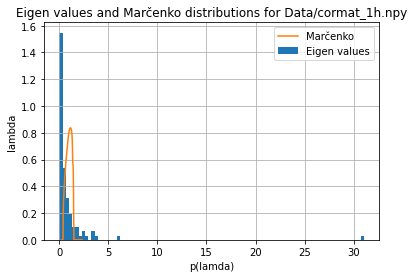

Denoised correlation matrix for Data/cormat_1h.npy
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.57375447 2.29242011 3.10166234 4.09597392 4.39073949 0.
 4.53059855 0.         4.39713899 4.36961528 0.         4.09267049
 3.55154655 3.17906261 0.         0.         1.6561935  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

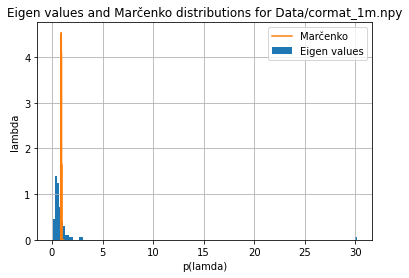

Denoised correlation matrix for Data/cormat_1m.npy


In [382]:
dataset_1h = 'Data/cormat_1h.npy'
dataset_1m = 'Data/cormat_1m.npy'

show_solution(dataset_1h, 3.6289)
show_solution(dataset_1m, 200.8969)


<h1>A07.2 - Correlation MSTs</h1>

Task: Build MSTs from denoised correlations and analyze them

+ make a scatterplot of the 1 hour vs 1 minute denoised correlations (1 data point per pair of stocks)

In [383]:
def scatter_plot(x, y, title, xaxis, yaxis):
    plt.title(title)
    plt.scatter(x, y, c="g")
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()

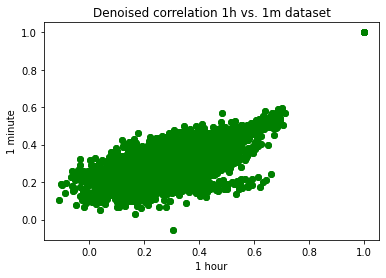

In [384]:
cormat_1h = np.load(dataset_1h)
eigval_1h, eigvec_1h = find_eigval(cormat_1h)

denoised_corr_1h = return_denoised_correlation(eigvec_1h, eigval_1h, 3.6289)


cormat_1m = np.load(dataset_1m)
eigval_1m, eigvec_1m = find_eigval(cormat_1m)

denoised_corr_1m = return_denoised_correlation(eigvec_1m, eigval_1m, 200.8969)


scatter_plot(denoised_corr_1h, denoised_corr_1m, "Denoised correlation 1h vs. 1m dataset", "1 hour", "1 minute")

+ from the denoised correlation matrices, build the Minimum Spanning Tree (see lecture)
+ assign the correct ticker (’AAPL’, ’AMZN’, …) as an attribute to the nodes and calculate the degrees
+ make a scatterplot of the 1 hour vs 1 minute MST degrees of stocks (1 data point per stock)

In [390]:
def get_mst(denoised_array, stocknames):
    dij = np.sqrt(2*(1-denoised_array))
    g = nx.from_numpy_array(dij)
    mst_g = nx.minimum_spanning_tree(g)
    nx.set_node_attributes(mst_g, stocknames, 'ticker')
    
    return mst_g


def plot_mst_degrees(denoised_array_h, denoised_array_m, stocknames):
    mst_g_h = get_mst(denoised_corr_1h, stocknames)
    mst_g_h_degrees = dict(mst_g_h.degree()).values()
    
    mst_g_m = get_mst(denoised_corr_1m, stocknames)
    mst_g_m_degrees = dict(mst_g_m.degree()).values()
    
    plt.title("1 hour vs 1 minute MST degrees of stocks")
    
    plt.scatter(mst_g_h_degrees,mst_g_m_degrees)
    plt.xlabel("1 hour")
    plt.ylabel("1 minute")
    plt.show()
    

['AAPL', 'ABBV', 'ABT', 'ACN', 'AIG', 'ALL', 'AMGN', 'AMZN', 'APA', 'APC', 'AXP', 'BA', 'BAC', 'BAX', 'BIIB', 'BK', 'BMY', 'C', 'CAT', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DIS', 'DOW', 'DVN', 'EBAY', 'EMC', 'EMR', 'EXC', 'F', 'FB', 'FCX', 'FDX', 'FOXA', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GS', 'HAL', 'HD', 'HON', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MON', 'MRK', 'MS', 'MSFT', 'NKE', 'NOV', 'NSC', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'QCOM', 'RTN', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TWX', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'UTX', 'V', 'VZ', 'WMT', 'XOM']


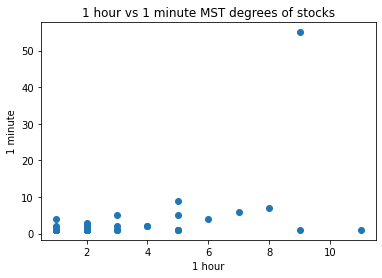

In [391]:
with open('Data/stocknames.txt') as sn:
    stocknames = [i.split('\n')[0] for i in sn.readlines() if i]
    
print(stocknames)

plot_mst_degrees(denoised_corr_1h, denoised_corr_1m, stocknames)

<h1>A07.3 - Conclusions</h1>

Task: finish the analysis by drawing conclusions

Answer the following questions (for both timescales):
1. Is there a ‘market mode’?

In [392]:
print("Market mode 1h timescale: {}\nMarketmode 1m timescale: {}".format(max(eigval_1h), max(eigval_1m)))

Market mode 1h timescale: 31.02783573849151
Marketmode 1m timescale: 30.159679989499114


2. Which is the stock that has the strongest relation with the market?

-

3. Which are the 5 stocks with highest degree on the MST?

In [394]:
mst_1h = get_mst(denoised_corr_1h, stocknames).degree()

max_degree = []

highest_degrees_1h = sorted(mst_1h, key=lambda x: x[1], reverse=True)[:5]

print("The stocks with the highest degrees for the 1h timescale are:")
for i in highest_degrees_1h:
    stockname = stocknames[i[0]]
    degree = i[1]
    print("{}: {}".format(stockname, degree))

   

print("\n")

mst_1m = get_mst(denoised_corr_1m, stocknames).degree()

max_degree = []

highest_degrees_1m = sorted(mst_1m, key=lambda x: x[1], reverse=True)[:5]

print("The stocks with the highest degrees for the 1m timescale are:")
for i in highest_degrees_1m:
    stockname = stocknames[i[0]]
    degree = i[1]
    print("{}: {}".format(stockname, degree))



    



The stocks with the highest degrees for the 1h timescale are:
GOOG: 11
HON: 9
MMM: 9
COP: 8
MET: 7


The stocks with the highest degrees for the 1m timescale are:
HON: 55
EMR: 9
COP: 7
MET: 6
GD: 5


4. Is the degree distribution of MSTs qualitatively the same at 1 minute and 1 hour?

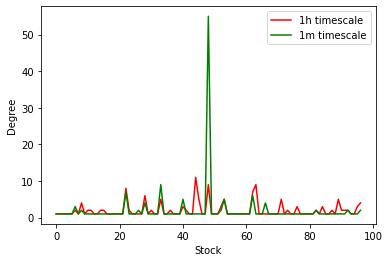

In [395]:
x_axis = np.arange(0,97,1)

plt.plot(x_axis, dict(mst_1h).values(), label="1h timescale", c='r')
plt.plot(x_axis, dict(mst_1m).values(), label="1m timescale", c='g')
plt.xlabel("Stock")
plt.ylabel("Degree")
plt.legend()
plt.show()

Sometimes they have a similar distribution, but not always.